In [7]:
import ezc3d
import numpy as np
import json
import pandas as pd
import pickle
import os
from io import StringIO

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp

import ipywidgets as widgets
from ipywidgets import interact,FloatSlider,IntSlider,interactive,HBox
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
from c3d_to_trc import read_trc_to_dataframe, read_c3d_to_df, read_sto_and_header_to_json

In [91]:
angle_pairs = [ 
            ['RHipAngles_X','hip_flexion_r', 1],
            ['RHipAngles_Y','hip_adduction_r', 1],
            ['RHipAngles_Z','hip_rotation_r', 1],
            ['LHipAngles_X','hip_flexion_l', 1],
            ['LHipAngles_Y','hip_rotation_l', 0],
            ['LHipAngles_Z','hip_adduction_l', 1],
            ['RKneeAngles_X','knee_angle_r', 1],
            ['LKneeAngles_X','knee_angle_l', 1],
            ['RAnkleAngles_X','ankle_angle_r', 1],
            ['LAnkleAngles_X','ankle_angle_l', 1],
            ]

file_pairs = [['IK_Dari_squat_subj1.sto', 'DARI_DATA/Captury_Subj1_squat02.c3d'],
             ['IK_Dari_squat_subj2.sto','DARI_DATA/Captury_Subj2_bilateral_squat03.c3d'],
             ['IK_Dari_squat_subj3.sto','DARI_DATA/Captury_Subj3_bilateral_squat02.c3d'],
             ['IK_Dari_squat_subj4.sto','DARI_DATA/Captury_Subj4_bilateral_squat01.c3d'],
             ['IK_Dari_squat_subj8.sto','DARI_DATA/Captury_Subj8_bilateral_squat02.c3d']]

In [78]:
angle_ch= angle_pairs[1]

def plot_and_save(angle_ch):
    fig2 = sp.make_subplots(rows=1, cols=5)
    
    ch_n = 1
    for i in file_pairs:
    #        print(ch_n, row_n)
    
        df_c3d = read_c3d_to_df(i[1])
    
        df_sto, header_json_str = read_sto_and_header_to_json(i[0])
    
        fig2.add_trace(go.Scatter(x = df_c3d['Time'], y = df_c3d[angle_ch[0]] , mode='lines', name=f'Dari, {angle_ch[0]}'), row=1, col=ch_n)
        
        y_osim = df_sto[angle_ch[1]]
    
        if angle_ch[2]:
            y = y_osim * -1.0
        else:
            y = y_osim 
        
        fig2.add_trace(go.Scatter(x = df_sto['time'], y = y, mode='lines', name=f'OpenSim_Dari, {angle_ch[1]}'), row=1, col=ch_n)
        
    #    fig2.add_trace(go.Scatter(x = df_sto_hss.index, y = df_sto_hss[ch[2]], mode='lines', name=f'OpenSim_HSS, {ch[2]}'), row=1, col=ch_n)
        
        
        fig2.update_yaxes(title_text='Angle, Deg.', row=1, col=ch_n)
        
        fig2.update_xaxes(title_text='Time, sec.', row=1, col=ch_n)
    
        ch_n = ch_n+1
        
    fig2.update_layout(
        autosize=False,
        width=1300,
        height=500,
    )
    
    fig2.show()

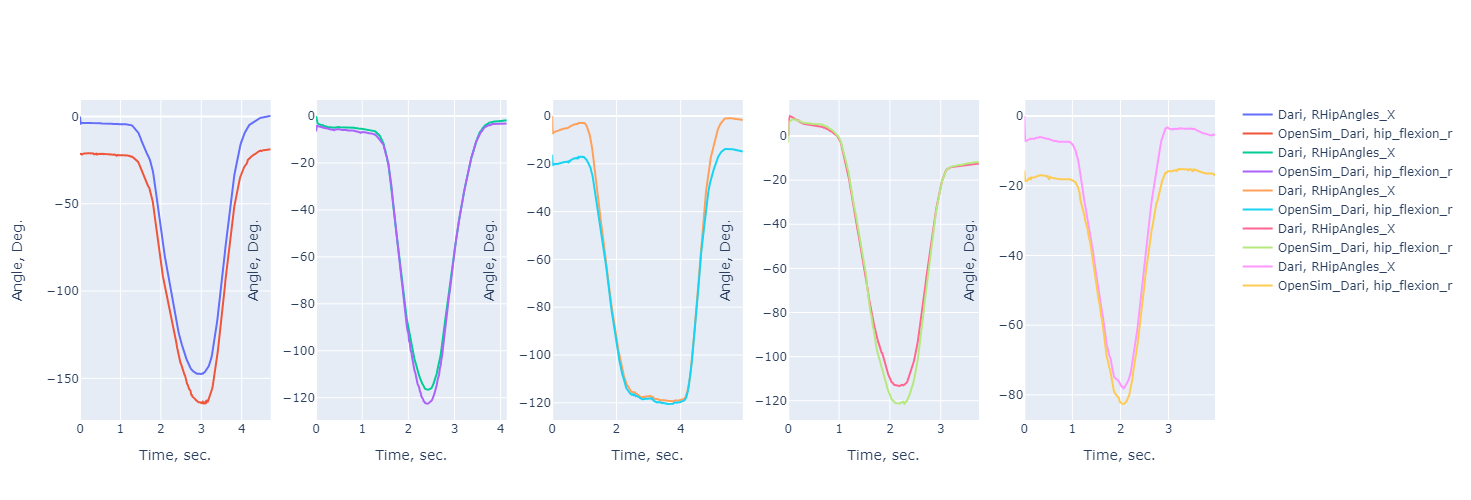

In [93]:
plot_and_save(angle_pairs[0])

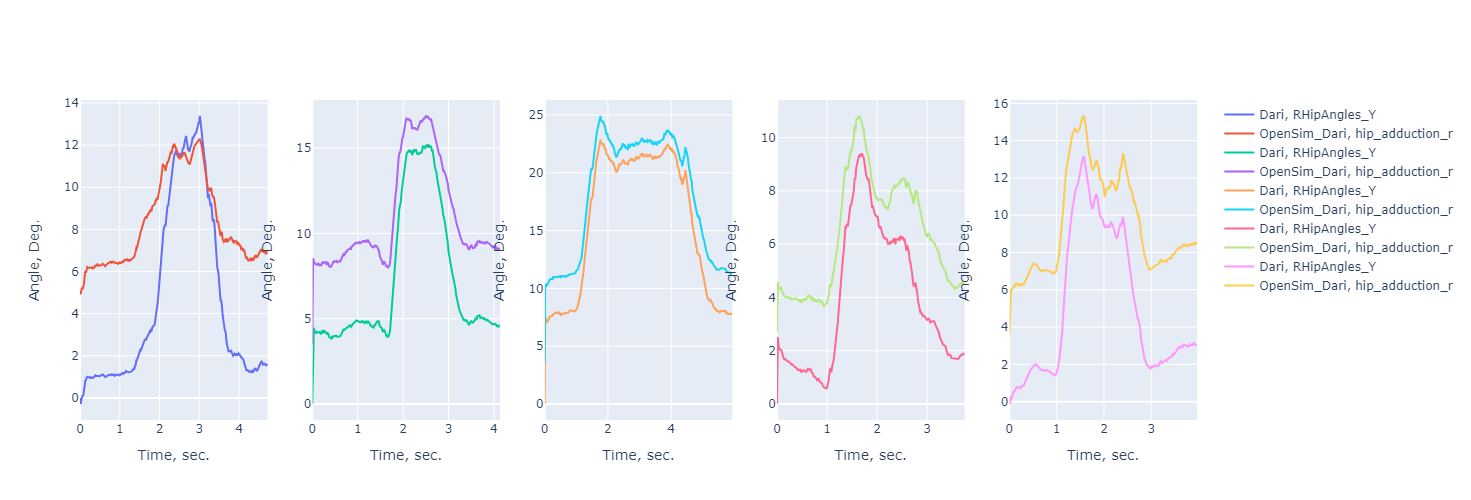

In [82]:
plot_and_save(angle_pairs[1])

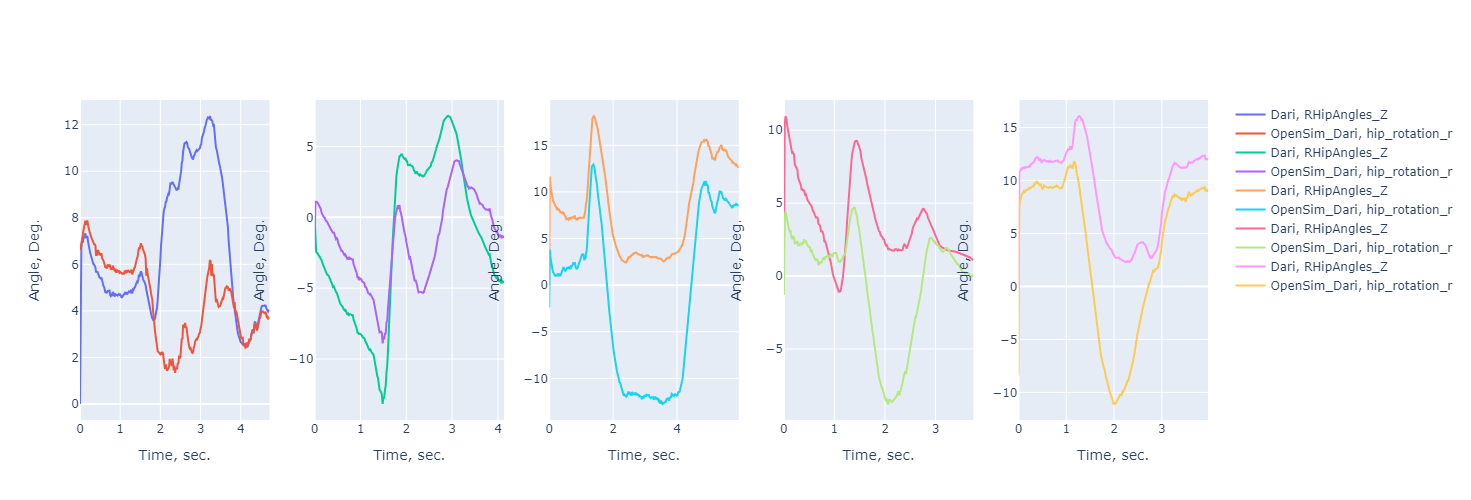

In [83]:
plot_and_save(angle_pairs[2])

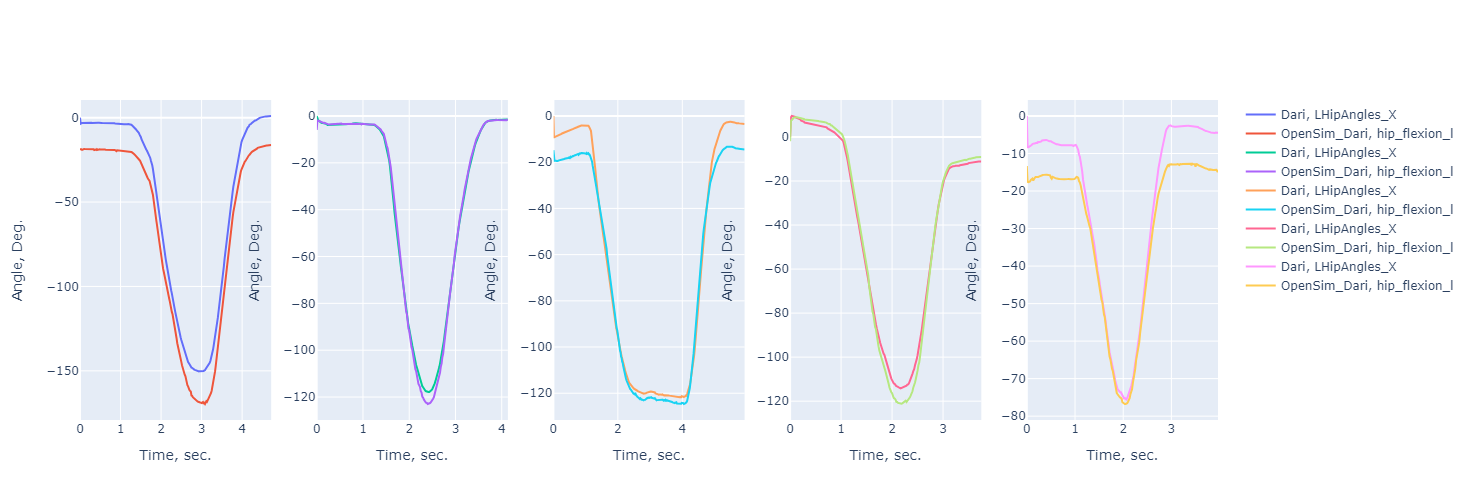

In [84]:
plot_and_save(angle_pairs[3])

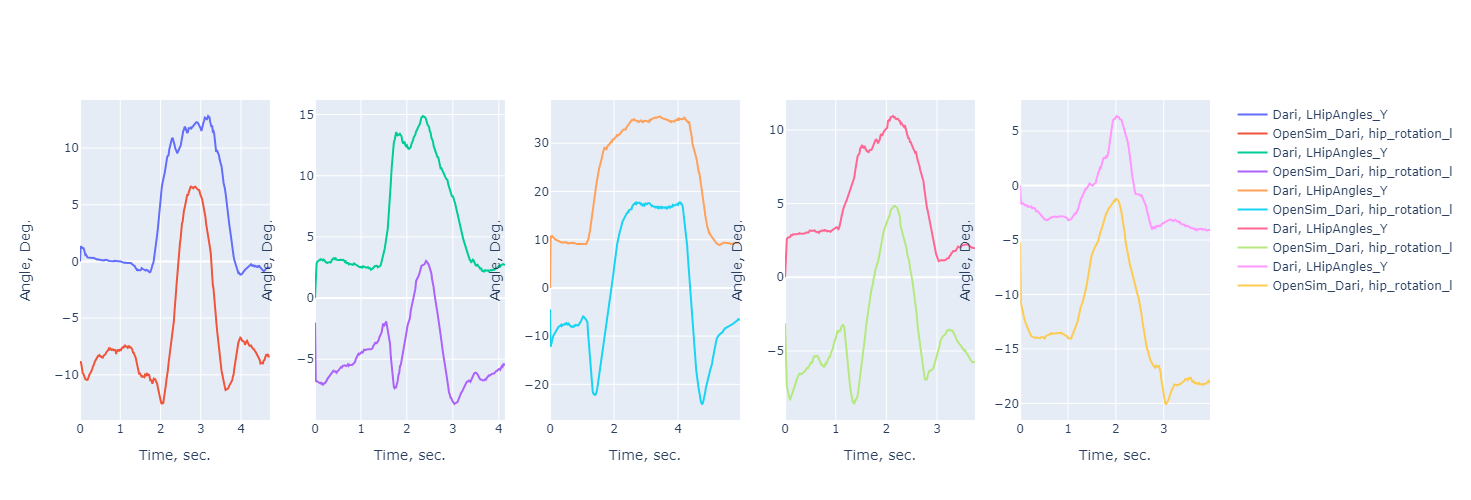

In [92]:
plot_and_save(angle_pairs[4])

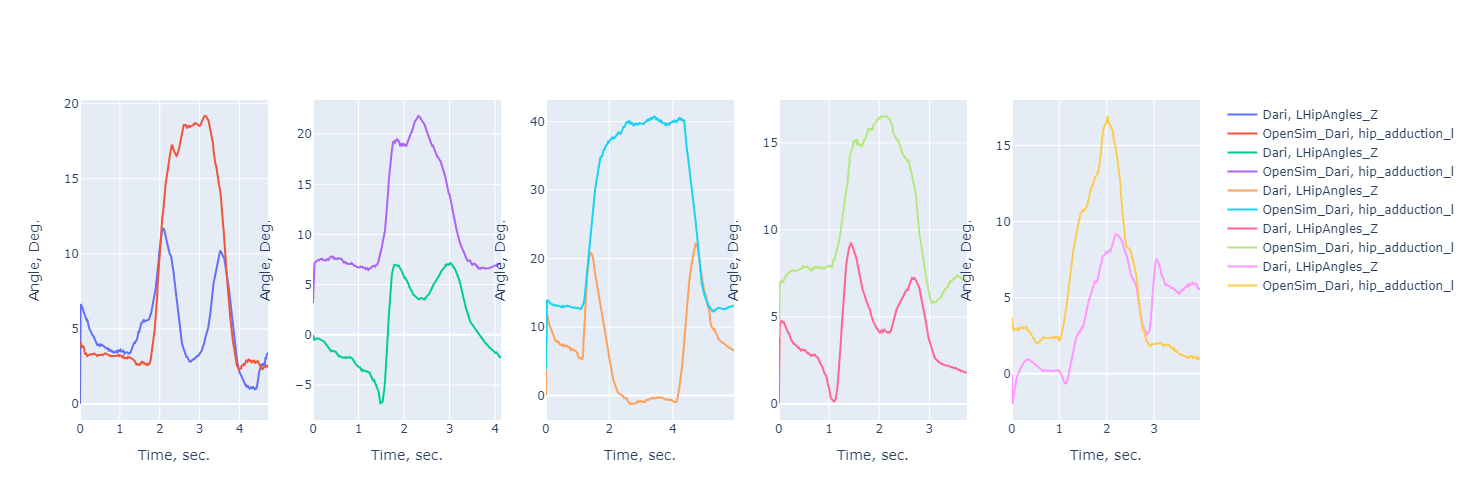

In [86]:
plot_and_save(angle_pairs[5])

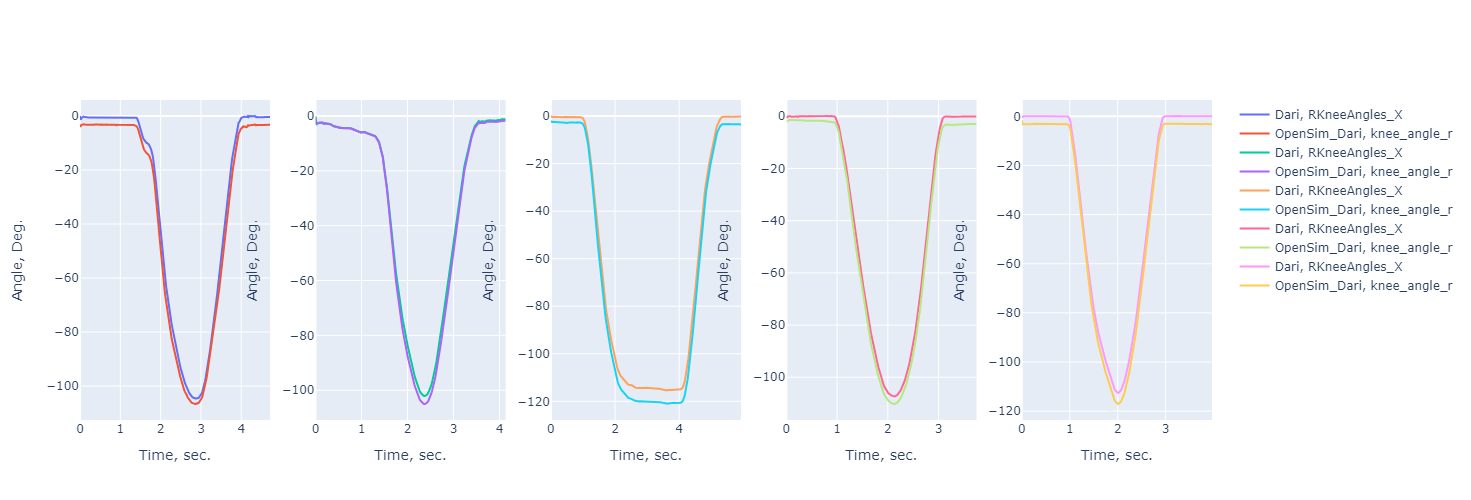

In [87]:
plot_and_save(angle_pairs[6])

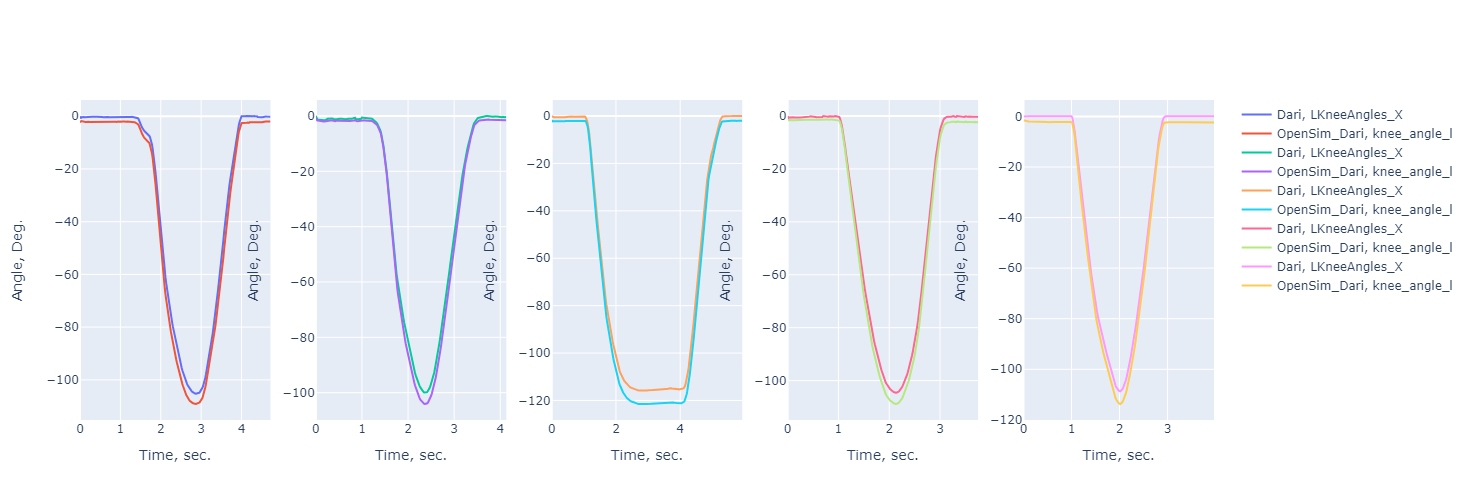

In [88]:
plot_and_save(angle_pairs[7])

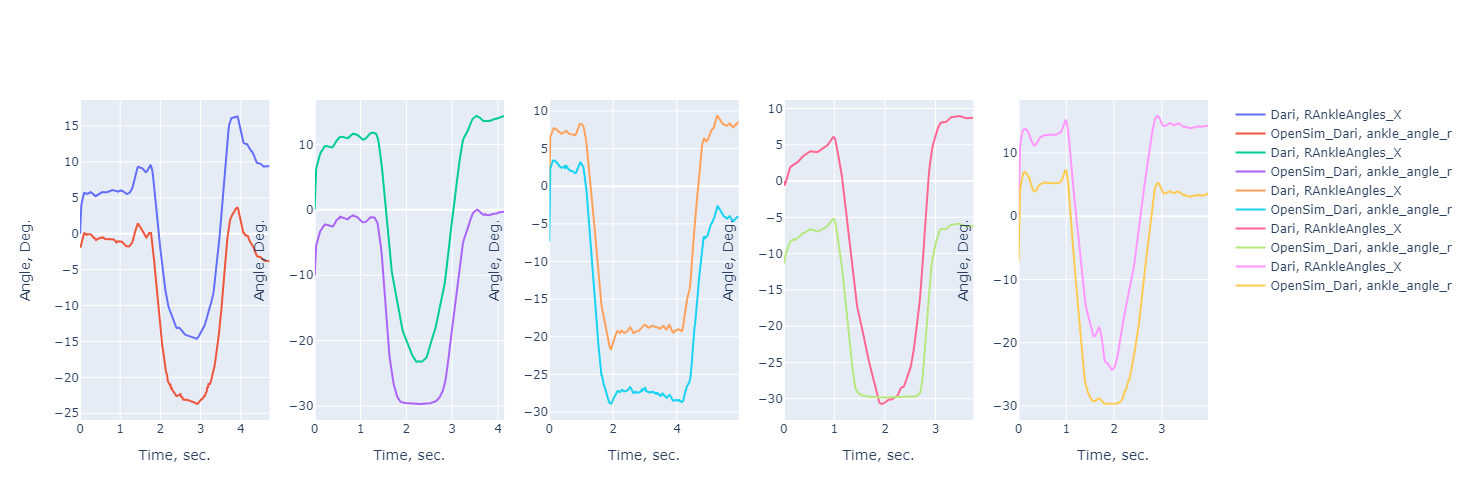

In [89]:
plot_and_save(angle_pairs[8])

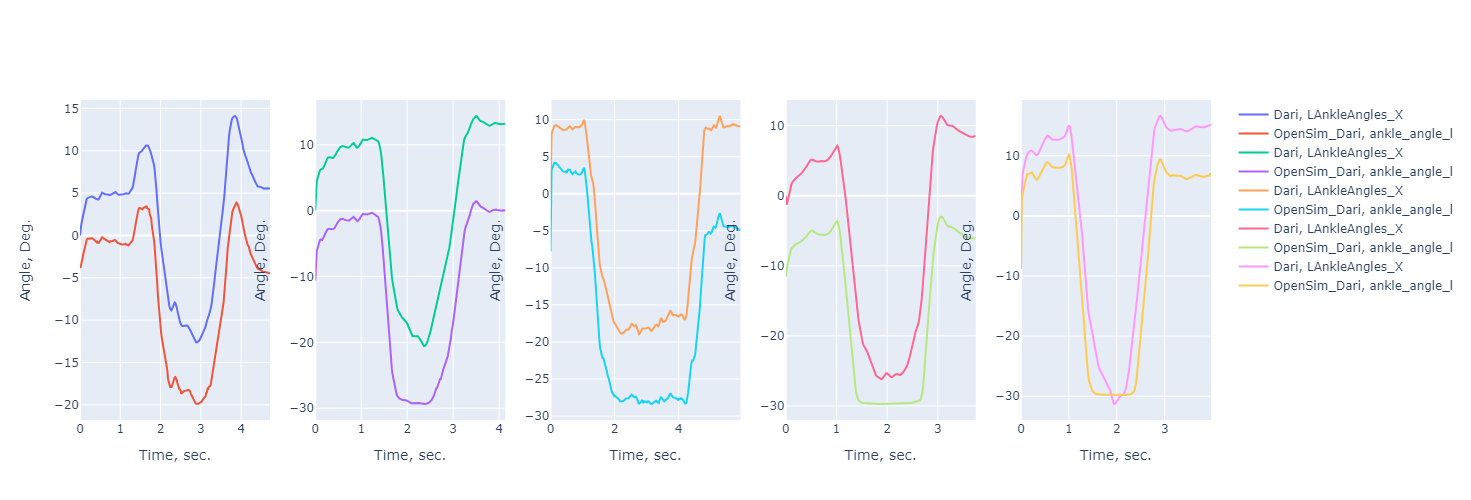

In [90]:
plot_and_save(angle_pairs[9])